In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
stat = df['Outcome'].describe().reset_index()
stat['Outcome'] = round(stat['Outcome'],2)
stat

,index,Outcome
0,count,768.00
1,mean,0.35
2,std,0.48
3,min,0.00
4,25%,0.00
5,50%,0.00
6,75%,1.00
7,max,1.00


In [10]:
corr = df.corr()

<Axes: >

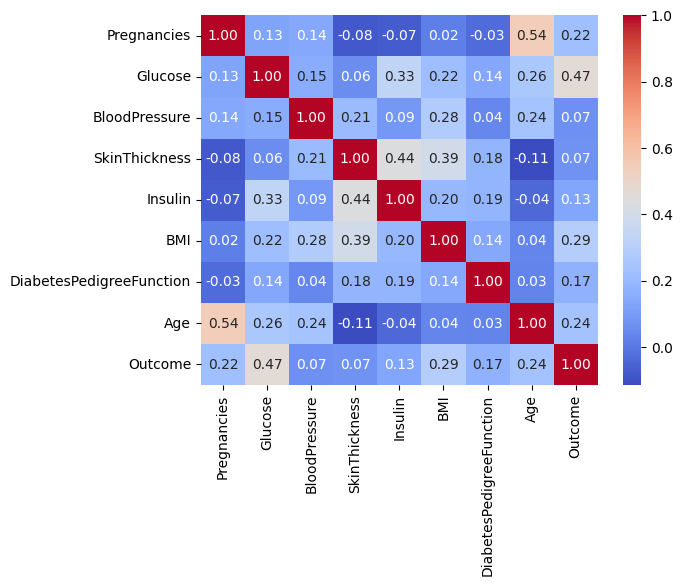

In [11]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f") 

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df["Outcome"].unique()

array([1, 0])

In [14]:
x = df.drop("Outcome", axis=1)  # all other columns
y = df["Outcome"]   # Outcome is the label (0 = no diabetes, 1 = diabetes)



In [15]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
lr_pred = model_lr.predict(x_test_scaled)


In [23]:
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("R² Score:", r2_score(y_test, lr_pred))

Mean Squared Error: 0.14696891256434105
R² Score: 0.34886704084141373


In [24]:
from sklearn.metrics import accuracy_score

# Convert predictions to 0/1 with a threshold (0.5)
lr_pred_binary = [1 if p >= 0.5 else 0 for p in lr_pred]

accuracy = accuracy_score(y_test, lr_pred_binary)
print("Accuracy:", accuracy)


Accuracy: 0.7987012987012987


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
log_reg_pred = log_reg.predict(x_test_scaled)
log_reg_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_pred))
print("Classification Report:\n", classification_report(y_test, log_reg_pred))

Accuracy: 0.8051948051948052
Confusion Matrix:
 [[89 12]
 [18 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       101
           1       0.74      0.66      0.70        53

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC(kernel="rbf", random_state=42)  # kernel can be "linear", "poly", "rbf", "sigmoid"
svm_model.fit(x_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [31]:
svm_pred = svm_model.predict(x_test_scaled)
svm_pred


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [32]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.7857142857142857
Confusion Matrix:
 [[88 13]
 [20 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       101
           1       0.72      0.62      0.67        53

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



In [33]:
from sklearn.model_selection import GridSearchCV


In [34]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

In [35]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [36]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7752632280421164


In [37]:
best_model = grid.best_estimator_
grid_pred = best_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, grid_pred))

Test Accuracy: 0.7987012987012987


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
rf_pred = rf.predict(x_test)

In [41]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       101
           1       0.71      0.66      0.69        53

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)  # you can tune max_depth
dt.fit(x_train_scaled, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
dt_pred = dt.predict(x_test_scaled)

In [45]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.7337662337662337
Confusion Matrix:
 [[83 18]
 [23 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       101
           1       0.62      0.57      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



we select the svm model that give us accuracy of 79
let we do tuning to increase accuracy

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [47]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [48]:
rf_model = RandomForestClassifier(random_state=42)


In [49]:
random_rf = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist_rf,
    n_iter=20,        # try 20 random combinations
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [50]:
random_rf.fit(x_train, y_train)

print("Best Parameters:", random_rf.best_params_)
print("Best CV Accuracy:", random_rf.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}
Best CV Accuracy: 0.7573237371717979


In [51]:
best_rf = random_rf.best_estimator_
print("Random Forest Test Accuracy:", best_rf.score(x_test, y_test))

Random Forest Test Accuracy: 0.7792207792207793


incresing accuracy of random forest


In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score



In [53]:
# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [54]:
# Predictions
xgb_pred = xgb.predict(x_test)



In [55]:
# Accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.7467532467532467


In [56]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}


In [57]:
grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid_xgb, 
    cv=3, 
    scoring='accuracy',
    n_jobs=-1
)

In [58]:
grid_xgb.fit(x_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [2, 3, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [59]:
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGBoost CV Accuracy:", grid_xgb.best_score_)


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Best XGBoost CV Accuracy: 0.7491471385302089


In [60]:
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
print("Best XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))


Best XGBoost Test Accuracy: 0.8051948051948052


In [62]:
import joblib
joblib.dump(rf,"model_diabetes.pkl")

['model_diabetes.pkl']